# Assignment 1

# Part A
* Load your image
1. Display it in RGB
2. Convert to grayscale ( use NumPy to calculate aggregates using the weighted sum formula )
3. Use the cvtColor function to do the same and compare results
4. Print the array shapes of both the RGB and grayscale images
5. Print a few pixel values of both

( Do you notice the difference that number of channels created on the array shape ?? )

In [1]:
# Import necessary libraries and modules
import io, base64, sys
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
local_image_path = ("apple.jpg")

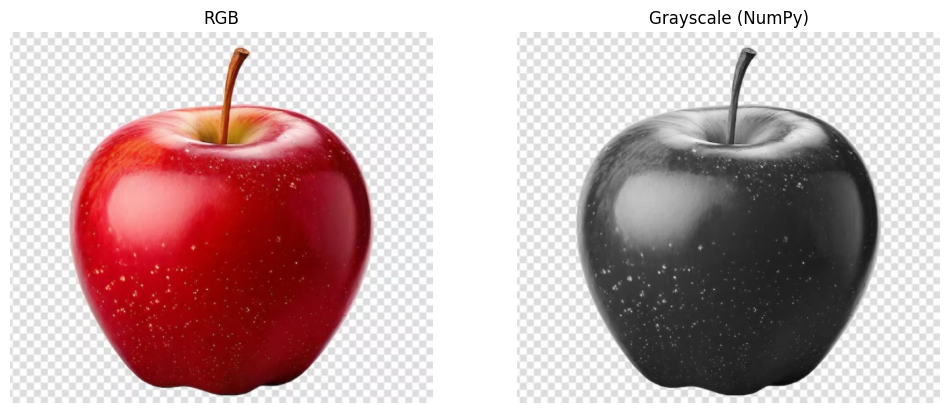

In [3]:
# Reading the image using OpenCV
img_bgr = cv2.imread(local_image_path)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)


# Now I am using grayscale from scratch 
weights = np.array([0.299, 0.587, 0.114], dtype=np.float32)
rgb_f = img_rgb.astype(np.float32)
gray = np.clip(np.dot(rgb_f, weights), 0, 255).astype('uint8')

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title('RGB')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(gray, cmap='gray')
plt.title('Grayscale (NumPy)')
plt.axis('off')

plt.show()



In this part, I load the image using OpenCV and convert it to RGB so Matplotlib can display it correctly.

To make the grayscale image from scratch, I use the standard weighted formula:

Gray = 0.299*R + 0.587*G + 0.114*B

These weights match how the human eye sees brightness (green is seen strongest, blue the weakest).  
Using NumPy, I apply this formula to every pixel and then show both the RGB and grayscale images.


In [4]:
# Print all Shapes and sample pixels
import numpy as np

print("RGB shape:", img_rgb.shape, " dtype:", img_rgb.dtype)   # (H,W,3)
print("BGR shape:", img_bgr.shape, " dtype:", img_bgr.dtype)   # (H,W,3)
print("NumPy grayscale shape:", gray.shape, " dtype:", gray.dtype)  # (H,W)


h, w = img_rgb.shape[:2]
coords = [(0,0), (h//2, w//2), (h-1, w-1)] # top-left, center, bottom-right
print("\nSample coordinates:", coords)

print("\nSample RGB pixels (R,G,B):")
for (r,c) in coords:
    print(f" ({r},{c}):", img_rgb[r,c].tolist())

print("\nSample BGR pixels (B,G,R):")
for (r,c) in coords:
    print(f" ({r},{c}):", img_bgr[r,c].tolist())

print("\nSample grayscale (NumPy) values:")
for (r,c) in coords:
    print(f" ({r},{c}):", int(gray[r,c]))



RGB shape: (550, 626, 3)  dtype: uint8
BGR shape: (550, 626, 3)  dtype: uint8
NumPy grayscale shape: (550, 626)  dtype: uint8

Sample coordinates: [(0, 0), (275, 313), (549, 625)]

Sample RGB pixels (R,G,B):
 (0,0): [245, 245, 245]
 (275,313): [189, 3, 6]
 (549,625): [254, 254, 254]

Sample BGR pixels (B,G,R):
 (0,0): [245, 245, 245]
 (275,313): [6, 3, 189]
 (549,625): [254, 254, 254]

Sample grayscale (NumPy) values:
 (0,0): 245
 (275,313): 58
 (549,625): 254


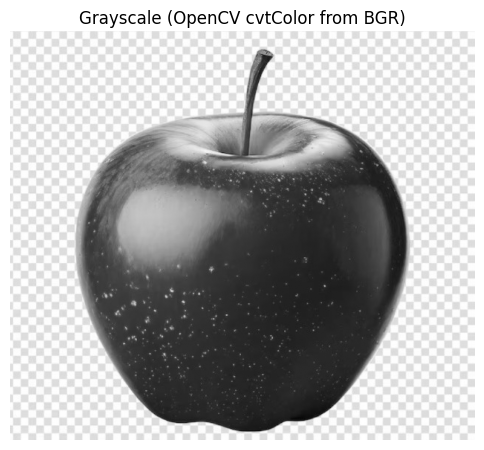

OpenCV grayscale shape: (550, 626)  dtype: uint8


In [5]:
# OpenCV grayscale (from BGR) 
import matplotlib.pyplot as plt

gray_cv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(6,6))
plt.imshow(gray_cv, cmap='gray')
plt.axis('off')
plt.title("Grayscale (OpenCV cvtColor from BGR)")
plt.show()

print("OpenCV grayscale shape:", gray_cv.shape, " dtype:", gray_cv.dtype)

   

#### OpenCV Grayscale Conversion

In this step, I convert the original BGR image to grayscale using OpenCV’s built-in function `cv2.cvtColor`.  
This method directly uses OpenCV's internal grayscale formula and is much faster than writing our own code.

I display the grayscale image using Matplotlib and also print its shape to confirm that:

This helps compare the OpenCV result with the NumPy grayscale result from the previous section.


## Did you notice the difference that the number of channels created on the array shape?”
- Yes,The RGB and BGR images have 3 channels, so their array shape is:(550, 626, 3)
- But the grayscale image has only 1 channel, so its shape becomes:(550,626) .There is no third dimension because grayscale stores only one intensity value per pixel.

# Part B
### B1. Compute the FFT of the grayscale image ( use NumPy )

* Steps:
- np.fft.fft2
- np.fft.fftshift
- Store as fshift

In [6]:
#  ensure we have a grayscale image called `gray` 
if 'gray' not in globals():
    if not os.path.exists("apple.jpg"):
        raise FileNotFoundError("No variable 'gray' and apple.jpg not found in notebook folder.")
    bgr = cv2.imread("apple.jpg", cv2.IMREAD_COLOR)
    rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
    weights = np.array([0.299, 0.587, 0.114], dtype=np.float32)
    gray = np.clip(np.dot(rgb.astype(np.float32), weights), 0, 255).astype(np.uint8)
    print("Loaded apple.jpg and computed gray.")

# convert to float for FFT
gray_f = gray.astype(np.float32)




Before doing the FFT, we first check if a grayscale image called `gray` already exists.  
If it does not exist, we load `apple.jpg`, convert it to RGB, and then create the grayscale image using the weighted formula.

After that, we compute:
- FFT of the grayscale image  
- Shift the FFT so that the low frequencies come to the center  



In [7]:
# B1: FFT and shift 
F = np.fft.fft2(gray_f)       # 2D FFT (zero-frequency at [0,0])
fshift = np.fft.fftshift(F)   # shift zero-frequency to centre 

### B2. Compute magnitude, phase and display Magnitude Spectrum

In [8]:
                   
# B2: magnitude and phase
magnitude = np.abs(fshift)        # |F(u,v)|
phase = np.angle(fshift)          # angle(F(u,v)) in radians

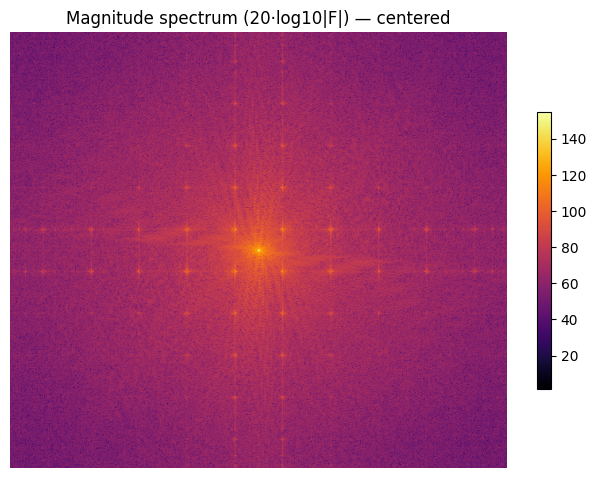

In [9]:
# log-scale magnitude for visualization 
eps = 1e-8
magnitude_log = 20 * np.log10(magnitude + eps)   # dB-like scaling


plt.figure(figsize=(8,6))
plt.imshow(magnitude_log, cmap='inferno')
plt.title("Magnitude spectrum (20·log10|F|) — centered")
plt.axis('off')
plt.colorbar(shrink=0.6)
plt.show()



- The bright yellow center = low frequency (very high magnitude)
- The fainter crosses and dots = edges and repeated structures (medium/high frequencies)
- Noise-like purple background = small random variations

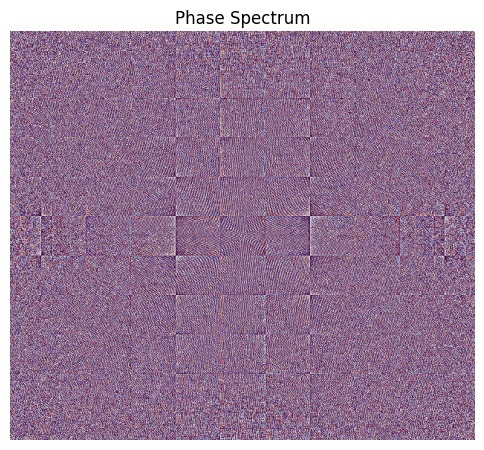

In [10]:
# Phase Spectrum Visualization
plt.figure(figsize=(6,6))
plt.imshow(phase, cmap='twilight')     
plt.title("Phase Spectrum")
plt.axis('off')
plt.show()


# Part C

### C1. Create 3 LPF masks
* Radii of filter: 10, 30, 80 (or image-size dependent, mention if you change)

- For each:
- Create a mask

1. Apply to fshift
2. Reconstruct using ifftshift + ifft2
3. Show blur levels increasing as radius decreases ( think why and write reason in code comment )

In [11]:
def show(img, title=None):
    plt.figure(figsize=(5,5))
    if img.ndim == 2:
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(img)
    if title: plt.title(title)
    plt.axis('off')
    plt.show()

In [12]:
# ensure gray exists (from earlier cells)
if 'gray' not in globals():
    if os.path.exists("apple.jpg"):
        bgr = cv2.imread("apple.jpg")
        rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
        weights = np.array([0.299, 0.587, 0.114], dtype=np.float32)
        gray = np.clip(np.dot(rgb.astype(np.float32), weights), 0, 255).astype(np.uint8)
        print("Created gray from apple.jpg")
    else:
        raise FileNotFoundError("No `gray` and apple.jpg not found in notebook folder.")

H, W = gray.shape
gray_f = gray.astype(np.float32)
F = np.fft.fft2(gray_f)
fshift = np.fft.fftshift(F)

# small epsilon to avoid division by zero
eps = 1e-9

In [13]:
# helper to make circular masks
def make_circular_mask(shape, radius, highpass=False):
    H, W = shape
    crow, ccol = H//2, W//2
    Y, X = np.ogrid[:H, :W]
    dist2 = (Y - crow)**2 + (X - ccol)**2
    mask = (dist2 <= radius*radius).astype(np.uint8)
    if highpass:
        mask = 1 - mask
    return mask



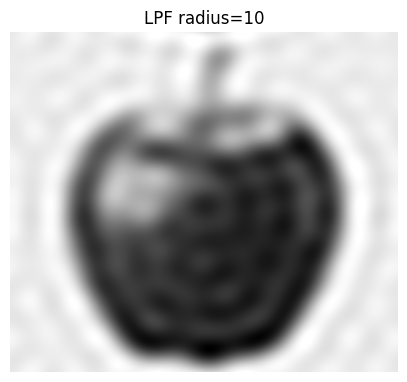

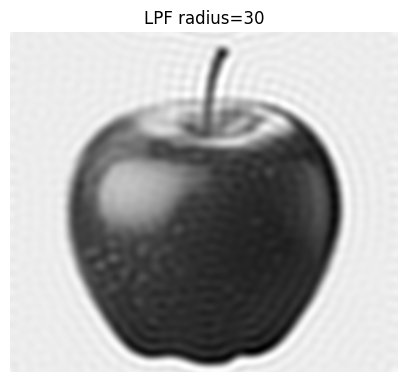

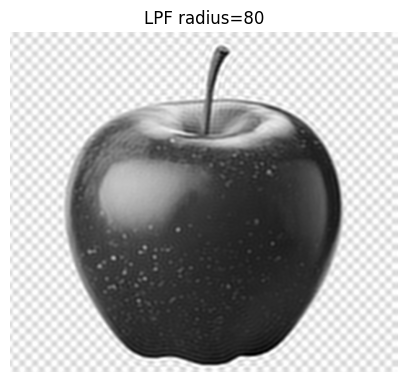

In [14]:
 #C1: LPF for radii 10, 30, 80 
radii = [10, 30, 80]
for r in radii:
    mask = make_circular_mask((H, W), r, highpass=False)
    fshift_masked = fshift * mask
    f_ishift = np.fft.ifftshift(fshift_masked)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.real(img_back)
    img_back = np.clip(img_back, 0, 255).astype(np.uint8)
    show(img_back, title=f"LPF radius={r}")
    cv2.imwrite(f"lpf_radius_{r}.png", img_back)
    





In this part, I apply circular low-pass filters of different radii (10, 30, 80) on the FFT of the grayscale image.

A low-pass filter keeps only the **low-frequency** components, which represent smooth areas of the image, and removes the **high-frequency** details like edges and noise.

- Smaller radius → keeps fewer frequencies → image becomes more blurred  
- Larger radius → keeps more frequencies → image looks clearer

For each radius:
1. I create a circular mask.
2. Multiply the mask with the shifted FFT.
3. Perform inverse FFT to get back the filtered image.
4. Display and save the output.



### C2. Create HPF mask
- Apply
- Reconstruct

In [15]:
# C2: HPF (invert a circular LPF) 
hpf_radius = 30
hpf_mask = make_circular_mask((H,W), hpf_radius, highpass=True)
fshift_hpf = fshift * hpf_mask
f_ishift_hpf = np.fft.ifftshift(fshift_hpf)
img_hpf_back = np.fft.ifft2(f_ishift_hpf)
img_hpf_back = np.real(img_hpf_back)





In this part, I create a circular high-pass filter by inverting a low-pass mask.  
A high-pass filter keeps **only the high-frequency details** such as edges, sharp boundaries, and fine textures, while removing the low-frequency smooth areas.

Steps performed:
1. Create a circular HPF mask using a chosen radius.
2. Multiply the mask with the shifted FFT to block low frequencies.
3. Apply inverse FFT to convert the filtered frequency data back into an image.
4. Normalize the result because HPF output can contain negative or very small values.
5. Display and save the final high-pass filtered image.



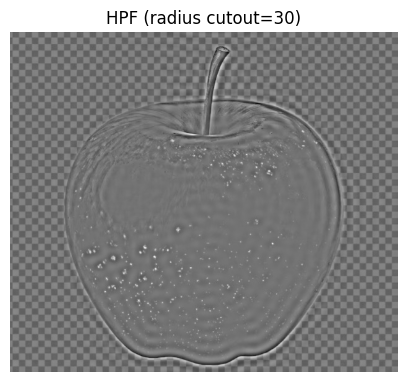

True

In [16]:
# HPF result may have negative values and small dynamic range; normalize for display:
minv = float(np.min(img_hpf_back))
ptp = float(np.ptp(img_hpf_back))   
img_hpf_disp = np.clip((img_hpf_back - minv) / (ptp + 1e-9) * 255, 0, 255).astype(np.uint8)

show(img_hpf_disp, title=f"HPF (radius cutout={hpf_radius})")
cv2.imwrite("hpf_radius_30.png", img_hpf_disp)


### C3. Create a square LPF mask
* Keep side of square as 50. The square will be at the center of the filter. Apply, Recontruct and show the output.

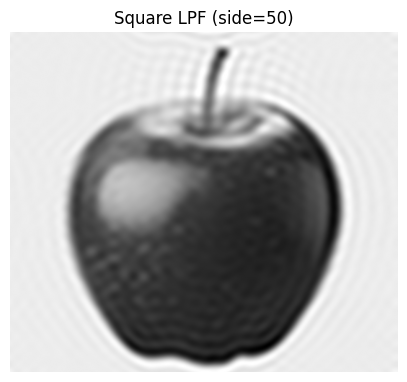

True

In [17]:
# C3: square LPF (centered) with side = 50
side = 50
mask_square = np.zeros((H, W), dtype=np.uint8)
crow, ccol = H//2, W//2
half = side // 2
r0, r1 = max(crow-half, 0), min(crow+half + (side%2), H)
c0, c1 = max(ccol-half, 0), min(ccol+half + (side%2), W)
mask_square[r0:r1, c0:c1] = 1

fshift_square = fshift * mask_square
f_ishift_square = np.fft.ifftshift(fshift_square)
img_sq_back = np.fft.ifft2(f_ishift_square)
img_sq_back = np.real(img_sq_back)
img_sq_back = np.clip(img_sq_back, 0, 255).astype(np.uint8)

show(img_sq_back, title=f"Square LPF (side={side})")
cv2.imwrite(f"square_lpf_side_{side}.png", img_sq_back)



# Part D

### D1. Phase-only reconstruction
* Use: phase_only = fshift / np.abs(fshift)

- Reconstruct and display.
- Also in code comments, mention the differnce between this code line and the one in the lecture : np.angle(f_shift)
- Try recontruction from np.angle(f_shift) once and explain your output in code comments

In [18]:
#  D1: Phase-only reconstruction
# Keep phase, remove magnitude
phase_only = fshift / (np.abs(fshift) + eps)   # complex array with magnitude ~1 and original phase

# Reconstruct from phase_only
f_ishift = np.fft.ifftshift(phase_only)
img_phase_only = np.fft.ifft2(f_ishift)
img_phase_only = np.real(img_phase_only)      # take real part

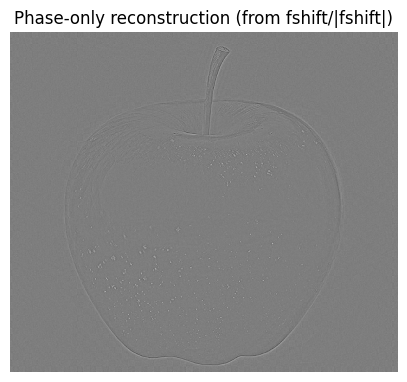

True

In [19]:
# normalize for display (scale to 0-255)
img_phase_only_disp = np.clip((img_phase_only - img_phase_only.min()) / (np.ptp(img_phase_only) + 1e-12) * 255, 0, 255).astype(np.uint8)

show(img_phase_only_disp, "Phase-only reconstruction (from fshift/|fshift|)")
cv2.imwrite("phase_only_from_ratio.png", img_phase_only_disp)

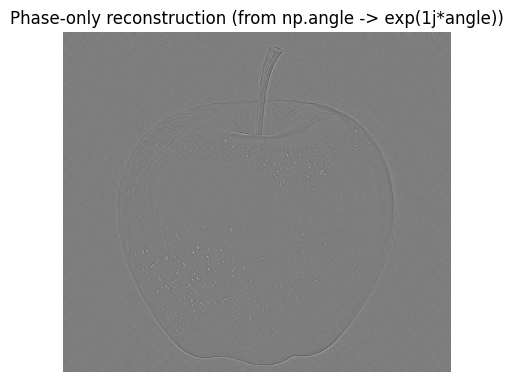

True

In [20]:
# Alternative: reconstruct from np.angle(fshift) explicitly
angle = np.angle(fshift)                       # in radians
phase_from_angle = np.exp(1j * angle)         # complex array with unit magnitude and same phase
f_ishift2 = np.fft.ifftshift(phase_from_angle)
img_phase_from_angle = np.fft.ifft2(f_ishift2)
img_phase_from_angle = np.real(img_phase_from_angle)
img_phase_from_angle_disp = np.clip((img_phase_from_angle - img_phase_from_angle.min()) / (np.ptp(img_phase_from_angle) + 1e-12) * 255, 0, 255).astype(np.uint8)

show(img_phase_from_angle_disp, "Phase-only reconstruction (from np.angle -> exp(1j*angle))")
cv2.imwrite("phase_only_from_angle.png", img_phase_from_angle_disp)



 - The line "phase_only = fshift / np.abs(fshift)" directly divides the complex spectrum by its magnitude,
 producing a complex array with magnitude ~1 and the original phase (same as exp(1j*angle)).
 - Using np.angle(fshift) and then exp(1j*angle) is equivalent mathematically: both produce a unit-magnitude complex array with the same phase. 
- The two methods give the same reconstruction 

### D2. Magnitude-only reconstruction

- Use: mag_only = np.abs(fshift)
- Reconstruct and display.

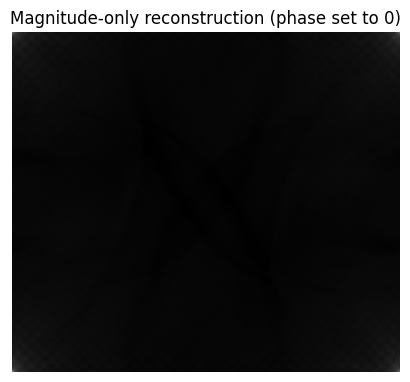

True

In [21]:
#  D2: Magnitude-only reconstruction 
# Keep magnitude, remove phase: set phase = 0 
mag_only = np.abs(fshift)   # real, non-negative array

# To reconstruct using ifft we need a complex array.
mag_only_complex = mag_only.astype(np.complex64)   # purely real complex array

# inverse shift and inverse FFT
f_ishift_mag = np.fft.ifftshift(mag_only_complex)
img_mag_only = np.fft.ifft2(f_ishift_mag)
img_mag_only = np.real(img_mag_only)
# normalize for display
img_mag_only_disp = np.clip((img_mag_only - img_mag_only.min()) / (np.ptp(img_mag_only) + 1e-12) * 255, 0, 255).astype(np.uint8)

show(img_mag_only_disp, "Magnitude-only reconstruction (phase set to 0)")
cv2.imwrite("mag_only_recon.png", img_mag_only_disp)